<a href="https://colab.research.google.com/github/ebatty/IntroCompNeuro/blob/main/Notes/DynamicalSystemsReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamical Systems Review

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 

# Section 1: One-dimensional dynamical systems



Much of the concepts (although not the specific example) covered in this section is covered in even greater detail in the following video. You can access the notes for this video here: https://osf.io/4twh6/

Video available at https://youtube.com/watch?v=rSMn_aU_XgA


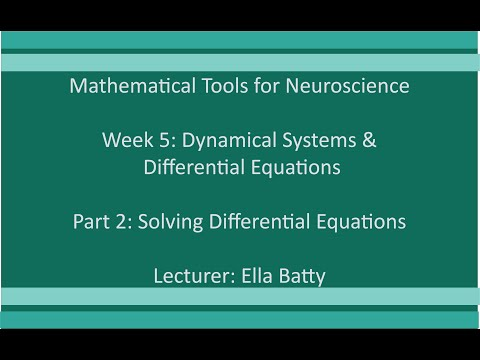

In [ ]:
  # @markdown Execute to see video on 1 differential equation and Euler's method
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="rSMn_aU_XgA", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)


Continuous dynamical systems concern the evolution of variables over time, where the update rules are differential equations.

Let's look at a dynamical system with just one variable concerning ion channel kinetics.


## Section 1.1: Dynamical System Example

Let's say that we have a population of ion channels of the same type, which are individually either open or closed. There is some rate at which the channels open, dependent on the voltage of the cell, $\alpha(V)$ and some rate at which they close, $\beta(V)$. These would be in units 1/ms (essentially the number of times in a ms that a gate closes and vice versa) and can be found empirically. We suddenly step the voltage to one that opens channels and keep it at that voltage. Although $\alpha$ and $\beta$ are normally voltage-dependent, we will treat them as constants from here on out since we are holding the voltage steady.

We need to introduce two more variables before writing out a differential equation that defines our system: $P_o$ is the proportion of channels that are open (or equivalently the probability that a particular channel is open) and $P_c$ is the the proportion of closed channels (or equivalently the probability that a particular channel is closed).

We will now write out a differential equation to model what happens when we step to a certain voltage. In particular, we want to figure out how the proportion of open channels, $P_o$, changes over time. This means we want to find a differential equation $\frac{dP_o}{dt} = ...$. We will take you through this process step by step.

Let's say $P(opening)$ is the proportion of channels opening over some tiny time step and $P(closing)$ is the proportion of channels closing. 

The rate of change of the proportion of open channels is the proportion that are opening minus the proportion that are closing:

$$\frac{dP_o}{dt} = P(opening) - P(closing)$$

The proportion of channels opening over a small time period is equal to the proportion that were closed times the rate of opening:

$$P(opening) = \alpha P_c$$


The proportion of channels closing over a small time period is equal to the proportion that were open times the rate of closing:

$$P(closing) = \beta P_o$$

Now we combine all of this information and the fact that the proportion of open channels and the proportion of closed channels must add up to 1:

$$\begin{align}
\frac{dP_o}{dt} &= P(opening) - P(closing) \\
&= \alpha P_c - \beta P_o \\
&= \alpha (1 - P_o) - \beta P_o \\
& = \alpha - (\alpha + \beta)P_o
\end{align}$$

We will assume that $\alpha=.3$ and $\beta=.1$

## Section 1.2: Analytical solution

**Note this is for demonstration purposes but you won't usually have to analytically solve equations in this course.**

In this case, we can actually solve this differential equation (integrate both sides) to come up with an equation for $P_o(t)$ that does not include a derivative.



The general form of a first order linear differential equation is:

$$ \frac{dx}{dt} + p(t)x = g(t)$$

In this case, we can compute the solution as:

$$ x(t) = \frac{\int \mu(t) g(t) dt + C}{\mu(t)} $$
where $\mu(t) = e^{\int p(t) dt}$.

Let's do so:

$$\begin{align} 
\frac{dP_o}{dt} & = \alpha - (\alpha + \beta)P_o \\
\frac{dP_o}{dt} + (\alpha + \beta)P_o & = \alpha \\
g(t) &= \alpha\\
p(t) &= \alpha+\beta \\
\mu(t) & = e^{\int p(t) dt} = e^{\int \alpha + \beta dt} = e^{(\alpha + \beta)t + C}
\end{align} $$

Now we substitute into our equation for $x(t)$. We will drop the C from $\mu$ because it's taken care of by the constant in this equation.


$$ \begin{align}
P_o(t) &= \frac{\int \mu(t) g(t) dt + C}{\mu(t)}\\
& = \frac{\int e^{(\alpha + \beta)t}\alpha dt + C}{e^{(\alpha+\beta)t}} \\
& = \frac{ \frac{\alpha}{\alpha+\beta}{e^{(\alpha+\beta)t}}+ C}{e^{(\alpha+\beta)t}}\\
& = \frac{\alpha}{\alpha+\beta} + Ce^{-(\alpha+\beta)t}
\end{align} $$

We now have our analytical solution. We can solve for C based on the initial condition.

## Section 1.3: Euler's method

Often, we can't come up with a nice analytical solution to a differential equation, so we have to use Euler's method.

Let's say we have a differential equation of y over time, $\frac{dy}{dt}$ and we know the value of $y$ at time $t_n$. We can approximate the value of y at time $t_{n+1}$ using the derivative. Specifically, the derivative gives the slope of a tangent line at the curve at $y_n$ (that's the definition of a derivative). 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Forward_Euler_method_illustration.png" width = "300">

Remember that the slope can also be computed as rise over run, so we could approximate as

$$\frac{dy}{dt} = \frac{y_{n+1} - y_n}{t_{n+1} - t_n} $$

if the time difference is really small. If we rearrange this equation and use $dt = t_{n+1} - t_n$, we get 

$$y_{n+1} = y_n + \frac{dy(t_n)}{dt}dt $$

We can keep stepping along and approximating the next y value using this equation. Note, it will only be an accurate approximation if dt is small.


In [ ]:
# @markdown Execute to get helper function `plot_trajectories`
def plot_trajectories(t, numerical_P, init_Po, alpha, beta):

  # Get analytical solution
  analytical_t = np.arange(0, t[-1], .01)
  C = init_Po - alpha/(alpha + beta)
  analytical_P = alpha/(alpha + beta) + C*np.exp(-(alpha+beta)*analytical_t)

  fig, ax = plt.subplots()
  ax.plot(analytical_t, analytical_P,'#33D396', linewidth=3)
  ax.plot(t, numerical_P, '#1F59EB')
  
  ax.set(xlabel='Time (ms)', ylabel = 'Probability of channel open', ylim=[-1, 1])
  plt.legend(['Analytical','Numerical'])
  



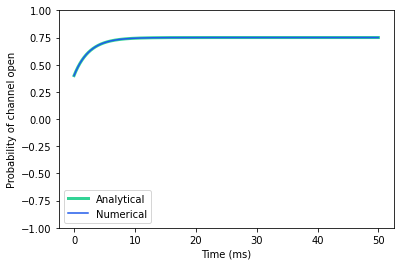

In [ ]:
def prob_open_euler_integration(init_Po, dt, T, alpha=0.3, beta=0.1):
  """Numerically approximate the solution of the differential equation governing 
  ion channel kinetics given an initial condition for a duration T. 

  Args:
    init_Po (scalar): value of Po at start of simulation (at time = 0)
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation
    alpha (scalar): rate of change of ion channel opening
    beta (scalar): rate of change of ion channel closing

  Returns:
    ndarray, ndarray: Po and the time t at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  P = np.zeros_like(t)
  P[0] = init_Po # This is Po at time 0

  # Step through time
  for n in range(0, len(t)-1):

    # for each point in time, compute dP_dt from P[n]
    dP_dt = alpha - (beta+alpha)*P[n]

    # Update P[n+1] based on P[n] and dP_dt
    P[n+1] = P[n] + dP_dt *dt

  return P, t


init_Po = .4
dt = .01 # step size is .01 ms
T = 50 # run simulation for 50 ms
alpha = .3
beta = .1

numerical_P, t = prob_open_euler_integration(init_Po, dt, T, alpha, beta)


plot_trajectories(t, numerical_P, init_Po, alpha, beta)


You can see that the numerical approximation so closely follows the analytical solution that they're indistinguishable in the plot above. With larger dt, these two lines would diverge more (the numerical approximation is less accurate).

## Section 1.4: Graphical fixed point analysis

Fixed points in continuous dynamical systems occur when all derivatives are equal to 0. These are also called equilibrium and critical points.


Fixed points can either be **stable** or **unstable**. In both cases, if the system is at the fixed point, it will stay there (because there is no change, the derivatives are equal to 0). If the system starts near a fixed point and goes towards it, that fixed point is stable. If the sytem starts near a fixed point and isn't drawn towards it, that fixed point is unstable.


Let's start by computing the equilibrium point in our system:

$$\frac{dP_o}{dt}= .3 - .4P_o = 0\\
P_o = 0.75$$

The equilibrium point occurs at $P_o = 0.75$. If the proportion of open channels is 0.75, the change in the proportion of open channels is 0 so it will never change! 

Now let's see if this is a stable or unstable point. To do so, we can plot $\frac{dP_o}{dt}$ vs $P_o$


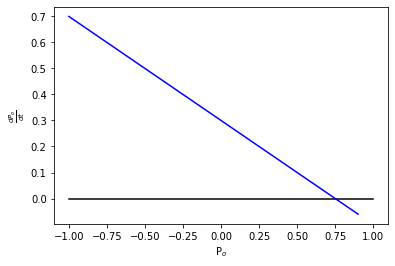

In [ ]:
# @markdown Execute to visualize dPo/dt vs Po

def plot_derivative_vs_variable(x, dx):

  fig, ax = plt.subplots()

  ax.plot([-1, 1], [0, 0],'k')
  ax.plot(x, dx, 'b')
  ax.set(xlabel=r'P$_o$', ylabel=r'$\frac{dP_o}{dt}$')


# Set parameters
alpha = .3
beta = .1

# We will evalute dP_o/dt on a span of possible P_o values
Po = np.arange(-1, 1, .1)

# Fill in your code here to compute dPo/dt for all Po above
dPo_dt = alpha - (beta+alpha)*Po

# Uncomment below to use plotting function plot_derivative_vs_variable
plot_derivative_vs_variable(Po, dPo_dt)

First of all, this validates our found equilibrium point - $\frac{dP_o}{dt}$ is 0 at $P_o = 0.75$.

From this plot you can see that if the proportion of open channels is below 0.75, the derivative is positive. This means that the rate of change of the proportion of open channels is positive, emaning that the proportion of open channels will grow. So if the proportion of open channels is below 0.75, it will grow.

If the proportion of open channels is above 0.75, the derivative is negative. So if the proportion of open channels is above 0.75, it will decrease.

This means this equilibrium point is stable! The proportion of open channels will converge onto the equilibrium point no matter where it starts.

You can see that in the trajectory plot above too - the proportion of open channels starts at .4 and grows to reach 0.75 and remains there.

# Section 2: Two-dimensional dynamical systems

A lot of what is covered in this section is covered in greater detail in the following video. You can access the notes for this video here: https://osf.io/sjz5x/

In [ ]:
  # @markdown Execute to see video on systems of differential equations
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="lV8SoeAxLgM", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

## Section 2.1: Plotting 2D systems of differential equations

TBD

## Section 2.2: Understanding trajectories with eigenstuff


### Section 2.2.1: Linear homogenous system

Let's assume we have two differential equations of the form:
\begin{align}
\frac{dx_1}{dt} &= a_1x_1 + a_2x_2\\
\frac{dx_2}{dt} &= b_1x_1 + b_2x_2
\end{align}

We can write this using matrix-vector notation:

\begin{align}
\frac{d\bar{x}}{dt} = A\bar{x}
\end{align}

where

\begin{align}
A = \begin{bmatrix}a_1 & a_2 \\ b_1 & b_2\end{bmatrix}
\end{align}

This is a linear homogenous system.

This system has one fixed point at (0, 0).

The eigenvalues and eigenvectors of A tell us the stability of this fixed point and what will happen in this system. See below to see what will happen with different eigenvalue options.

In [ ]:
#@markdown Execute this cell to view dynamical systems gif

from IPython.display import Image

Image(url = 'https://github.com/ebatty/MathToolsforNeuroscience/blob/master/dynsysdemo.gif?raw=True', width=700)

### Section 2.2.2: Linear nonhomogenous system

Let's say you have a very similar system but you have constants added to both differential equations:

\begin{align}
\frac{dx_1}{dt} &= a_1x_1 + a_2x_2 + c_1\\
\frac{dx_2}{dt} &= b_1x_1 + b_2x_2 + c_2
\end{align}

We can write this using matrix-vector notation:

\begin{align}
\frac{d\bar{x}}{dt} = A\bar{x} + \bar{c}
\end{align}

The origin is no longer necessarily a fixed point. Instead, we can compute a new fixed point $\bar{x_C}$ that results in 

$$\frac{d\bar{x}}{dt}  = 0$$.

Now we can classify the dynamics around the fixed point using the eigenvalues of A just as in Section 2.2.1. So the dynamical system will look the same given the eigenvalues category, just around the new fixed point instead of the origin.



### Section 2.2.3: Nonhomogenous systems

Let's say we have more complex differential equations:

\begin{align}
\frac{dx_1}{dt} &= F(x_1, x_2)\\
\frac{dx_2}{dt} &= G(x_1, x_2)
\end{align}

where $F$ and $G$ are some complex functions. This system could have any number of fixed points.

This system is more complicated that the simple case in Section 2.2.1, but we can still use the information there. 

First, we need to find the fixed points of this system. It turns out that we can approximate the system near each fixed point as a more simple system:

\begin{align}
\frac{d\bar{x}}{dt} = J\bar{x}
\end{align}
where $J$ is the Jacobian of the system, the matrix of partial derivatives:

$$J = \begin{bmatrix}\frac{dF}{dx_1} & \frac{dF}{dx_2} \\ \frac{dG}{dx_1} & \frac{dG}{dx_2}\end{bmatrix}$$

So, the eigenvalues of the Jacobian at a fixed point tells us the behavior near that fixed point.